Visualization 1

In [1]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import PIL
import requests

In [ ]:
#setting a seed for randomization / reproducibility
np.random.seed(613)
#x-axis, generate an array of values from 0:50
x = np.arange(50)
#y-axis, generate random numbers from a range
y = np.random.randint(0, 100, 50)



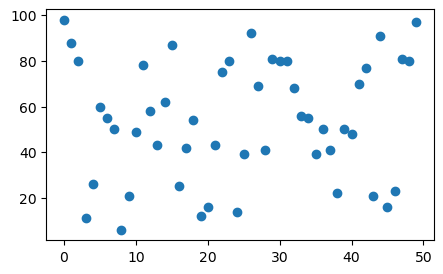

In [ ]:
#create a chart as a scatterplot 
fig, ax = plt.subplots(figsize = (5,3))
ax.scatter(x, y)

<BarContainer object of 50 artists>

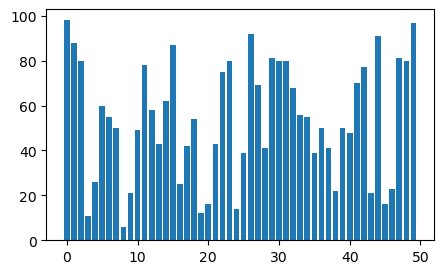

In [ ]:
#same chart but as a bargraph 
fig, ax = plt.subplots(figsize=(5, 3))
ax.bar(x,y)

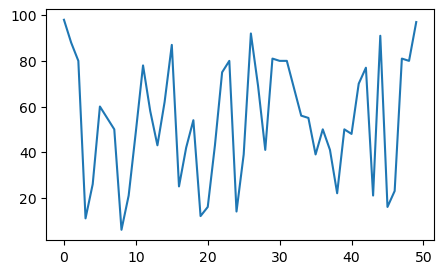

In [ ]:
#same chart as a line plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(x,y)

(array([4., 6., 2., 5., 7., 6., 4., 3., 9., 4.]),
 array([ 6. , 15.2, 24.4, 33.6, 42.8, 52. , 61.2, 70.4, 79.6, 88.8, 98. ]),
 <BarContainer object of 10 artists>)

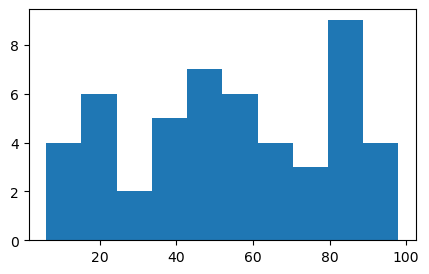

In [ ]:
#same chart as a histogram (x is omitted)
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(y)

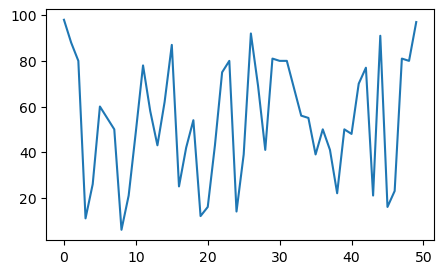

In [ ]:
#same line graph as before
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(x,y)



In [11]:
ax.set_title('Total growth over time')
ax.set_ylabel('Total growth')
ax.set_xlabel('Years since start')

Text(0.5, 4.444444444444445, 'Years since start')

Text(0.5, 0, 'Years since start')

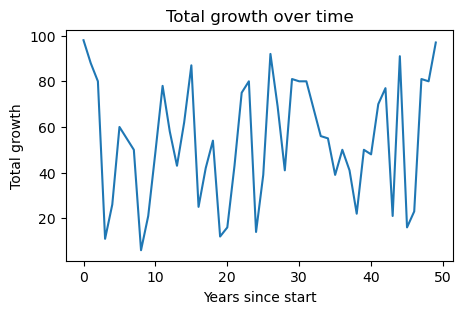

In [ ]:
#same line graph as before but with labels
fig, ax = plt.subplots(figsize = (5,3))
ax.plot(x,y)
ax.set_title('Total growth over time')
ax.set_ylabel('Total growth')
ax.set_xlabel('Years since start')

In [22]:
#creating dictionaries for modified fonts (fonts 1/2 for different elements)
font1 = {'family':'sans-serif','color':'red','size':20}

font2 = {'family':'monospace','color':'blue',
         'size':14}

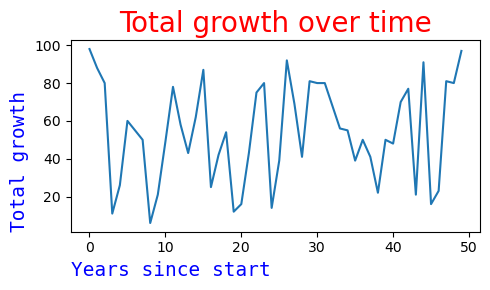

In [ ]:
#add fontdict with modified fonts, different locations of title/labels . tight layout (?)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x,y)

ax.set_title('Total growth over time', fontdict = font1, loc='center')
ax.set_ylabel('Total growth', fontdict = font2, loc='bottom')
ax.set_xlabel('Years since start', fontdict = font2, loc='left')
fig.tight_layout()

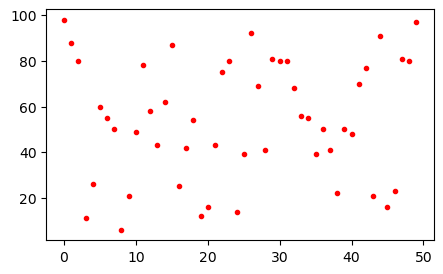

In [26]:
#change marker shape and colour (color!) 
fig, ax = plt.subplots(figsize = (5,3))

ax.scatter(x, y,
           marker = '.',
           color = 'red')

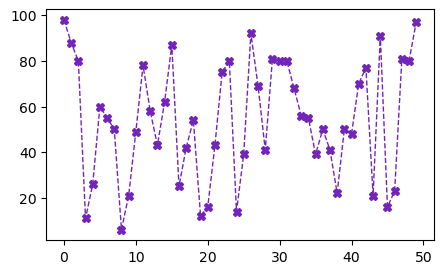

In [ ]:
#different line styles and widths
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(x,y,
        marker = 'X',
        color = '#7425b9',
        linestyle = '--',
        linewidth = 1)

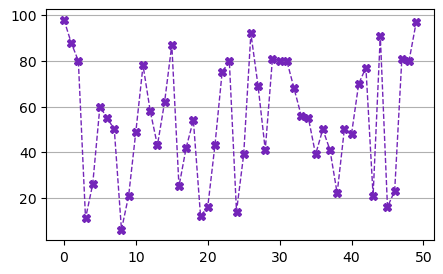

In [ ]:
#add a grid
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(x,y,
        marker = 'X',
        color = '#7425b9',
        linestyle = '--',
        linewidth = 1)
ax.grid(axis = 'y')

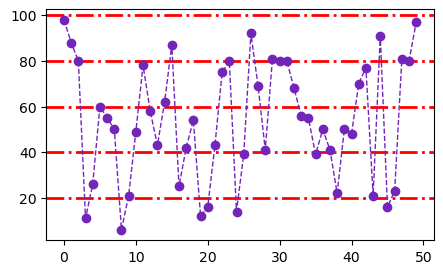

In [34]:
#marker style change, grid color and width and style
fig, ax = plt.subplots(figsize=(5,3))

ax.plot(x,y,
        marker = 'o',
        color = '#7425b9',
        linestyle = '--',
        linewidth = 1)
ax.grid(axis = 'y', color='red', 
        linewidth = 2, linestyle = '-.')

In [46]:
#make a choropleth map
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs



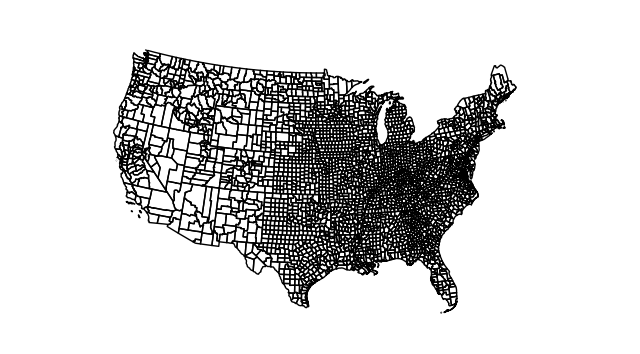

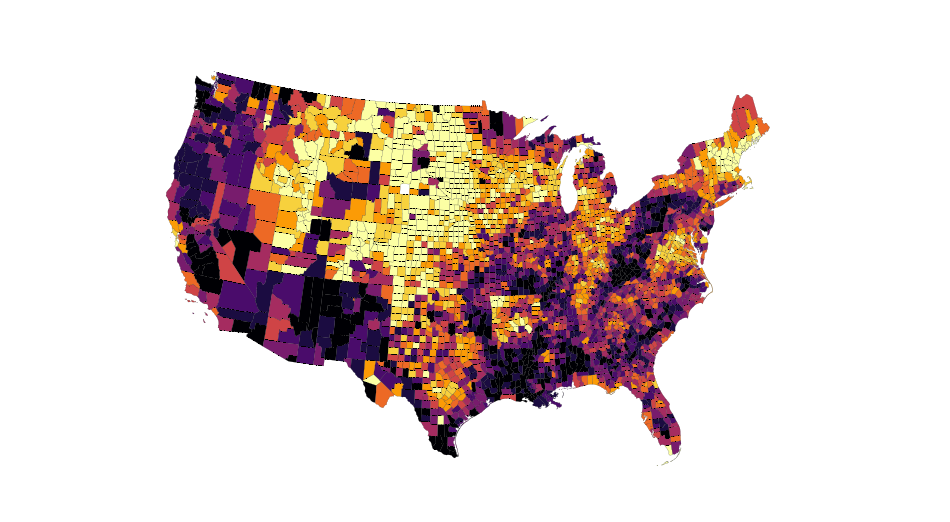

In [ ]:
# Load the json file with county coordinates
geoData = gpd.read_file(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson'
)

# Make sure the "id" column is an integer
geoData.id = geoData['id'].astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
statesToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(statesToRemove)]

# Basic plot with just county outlines
gplt.polyplot(
    geoData,
    projection=gcrs.AlbersEqualArea()
)

# Read file
data = pd.read_csv(
    'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/unemployment-x.csv')

# Show the distribution of unemployment rate
sns.histplot(data["rate"])

fullData = geoData.merge(
    data,
    left_on=['id'],  # identifier from geodataframe
    right_on=['id']  # identifier from dataframe
)
fullData.head(3)

# for color mapping with 10 different colors
import mapclassify as mc
scheme = mc.Quantiles(fullData['rate'], k=10)

# Map
gplt.choropleth(
    fullData,
    projection=gcrs.AlbersEqualArea(),
    hue="rate",
    scheme=scheme, cmap='inferno_r',
    linewidth=.1,
    edgecolor='black',
    figsize=(12, 8)
)
plt.show()